In [1]:
import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

In [2]:
yes_tumor = 'Brain Tumor Dataset/yes'
no_tumor = 'Brain Tumor Dataset/no'

In [4]:
dirlist=[no_tumor, yes_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    print(filelist)
    print('\n')
    for f in filelist:
        filepath=os.path.join (i,f)
# os.path.join('brain_tumor_dataset/no/','1 no.jpeg;)
# brain_tumor_dataset/no/1 no.jpeg
        filepaths.append(filepath)
# store the path into empty list called filepaths
        labels.append(j)
    print(filepaths)
    print('\n')
    print(labels)
    print('\n')
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 7.jpeg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 90.jpg', 'no 91.jpeg', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no

In [5]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
print(df)

                            filepaths labels
0    Brain Tumor Dataset/no\1 no.jpeg     No
1    Brain Tumor Dataset/no\10 no.jpg     No
2    Brain Tumor Dataset/no\11 no.jpg     No
3    Brain Tumor Dataset/no\12 no.jpg     No
4    Brain Tumor Dataset/no\13 no.jpg     No
..                                ...    ...
248   Brain Tumor Dataset/yes\Y95.jpg    Yes
249   Brain Tumor Dataset/yes\Y96.jpg    Yes
250   Brain Tumor Dataset/yes\Y97.JPG    Yes
251   Brain Tumor Dataset/yes\Y98.JPG    Yes
252   Brain Tumor Dataset/yes\Y99.JPG    Yes

[253 rows x 2 columns]


In [6]:
df['labels']=pd.get_dummies(df['labels'])
print(df)

                            filepaths  labels
0    Brain Tumor Dataset/no\1 no.jpeg       1
1    Brain Tumor Dataset/no\10 no.jpg       1
2    Brain Tumor Dataset/no\11 no.jpg       1
3    Brain Tumor Dataset/no\12 no.jpg       1
4    Brain Tumor Dataset/no\13 no.jpg       1
..                                ...     ...
248   Brain Tumor Dataset/yes\Y95.jpg       0
249   Brain Tumor Dataset/yes\Y96.jpg       0
250   Brain Tumor Dataset/yes\Y97.JPG       0
251   Brain Tumor Dataset/yes\Y98.JPG       0
252   Brain Tumor Dataset/yes\Y99.JPG       0

[253 rows x 2 columns]


<Figure size 288x288 with 0 Axes>

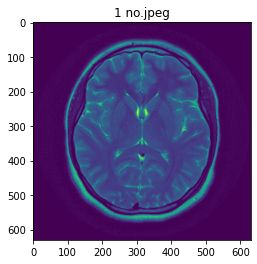

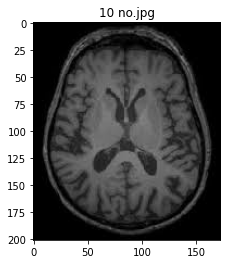

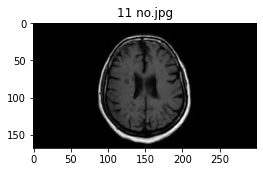

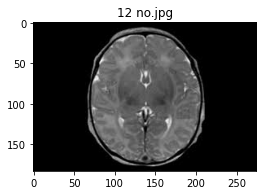

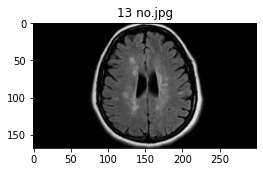

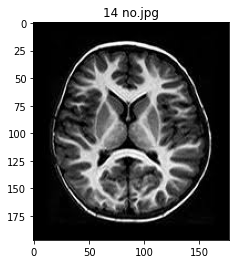

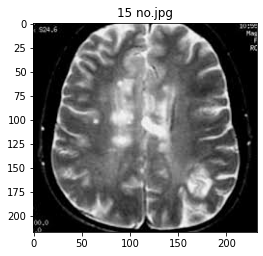

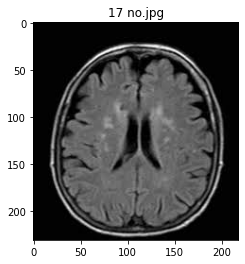

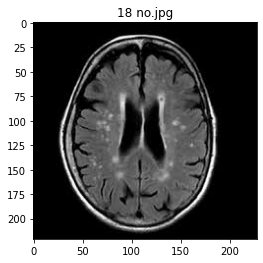

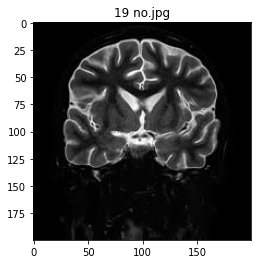

In [7]:
plt.figure(figsize=(4,4))
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

In [8]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


In [9]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image

In [10]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [11]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [12]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [13]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [19]:
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 29s 1s/step - loss: 0.8818 - accuracy: 0.6316 - val_loss: 0.4590 - val_accuracy: 0.8627
Epoch 2/10
21/21 [==============================] - 26s 1s/step - loss: 0.5765 - accuracy: 0.7292 - val_loss: 0.4060 - val_accuracy: 0.8431
Epoch 3/10
21/21 [==============================] - 27s 1s/step - loss: 0.4213 - accuracy: 0.7901 - val_loss: 0.4042 - val_accuracy: 0.8039
Epoch 4/10
21/21 [==============================] - 27s 1s/step - loss: 0.3998 - accuracy: 0.8032 - val_loss: 0.3993 - val_accuracy: 0.8039
Epoch 5/10
21/21 [==============================] - 26s 1s/step - loss: 0.3079 - accuracy: 0.8396 - val_loss: 0.4357 - val_accuracy: 0.8039
Epoch 6/10
21/21 [==============================] - 26s 1s/step - loss: 0.1930 - accuracy: 0.9214 - val_loss: 0.5519 - val_accuracy: 0.8235
Epoch 7/10
21/21 [==============================] - 27s 1s/step - loss: 0.1455 - accuracy: 0.9408 - val_loss: 0.7399 - val_accuracy: 0.7647
Epoch 8/10
21/21 [==

Test loss: 0.9830607771873474
Test accuracy: 0.843137264251709


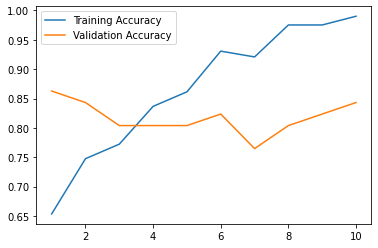

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()